In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    print(y.shape, tx.shape)
    w = tx.T @ tx
    w = np.linalg.inv(w)
    trans = tx.T
    print(trans.shape, y.shape)
    w2 = trans @ y
    w = w @ w2
    error = y - tx.dot(w.transpose())
    loss = 0.5 * np.mean(error ** 2)
    return w, loss

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
def calculate_mse(error):
    return 0.5 * np.mean(error ** 2)

def calculate_mae(error):
    return np.mean(np.abs(error))

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    error = y - tx.dot(w.transpose())
    return calculate_mae(error)
    # ***************************************************
    raise NotImplementedError

In [4]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    # ***************************************************
    grid = np.array(np.meshgrid(w0, w1)).T.reshape(-1, 2)
    losses = [compute_loss(y, tx, np.array(weights)) for weights in grid]
    losses = np.reshape(np.array(losses).T, (len(w0), len(w1)))
    return losses
    # ***************************************************
    raise NotImplementedError

In [5]:
from grid_search import generate_w, get_best_parameters

def grid_search_2(y, tx):

    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=10)

    # Start the grid search
#     start_time = datetime.datetime.now()
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
#     end_time = datetime.datetime.now()
#     execution_time = (end_time - start_time).total_seconds()

    # Print the results
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}".format(
          l=loss_star, w0=w0_star, w1=w1_star))

    return [w0_star, w1_star], loss_star

In [6]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w_grid, loss_grid = grid_search_2(y=y, tx=tx)
    print(tx.shape)
    w_norm, loss_norm = least_squares(y, tx)
    return w_norm, w_grid, loss_norm, loss_grid
    raise NotImplementedError

Test it here

In [7]:
test_your_least_squares()

Grid Search: loss*=7.5885150157040915, w0*=66.66666666666669, w1*=16.666666666666686
(10000, 2)
(10000,) (10000, 2)
(2, 10000) (10000,)


(array([73.293922  , 13.47971243]),
 [66.66666666666669, 16.666666666666686],
 15.3858878688294,
 7.5885150157040915)

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [8]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [9]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    exp_x = np.array([x, ] * (degree + 1))
    return np.power(exp_x.T, range(degree + 1))

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [10]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        x_exp = build_poly(x, degree)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        weights, loss = least_squares(y, x_exp)
        rmse = np.sqrt(2* loss)
        # ***************************************************

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

(50,) (50, 2)
(2, 50) (50,)
Processing 1th experiment, degree=1, rmse=0.47187607963421874
(50,) (50, 4)
(4, 50) (50,)
Processing 2th experiment, degree=3, rmse=0.25858277667737495
(50,) (50, 8)
(8, 50) (50,)
Processing 3th experiment, degree=7, rmse=0.24965870360907708
(50,) (50, 13)
(13, 50) (50,)
Processing 4th experiment, degree=12, rmse=0.9407431100114377


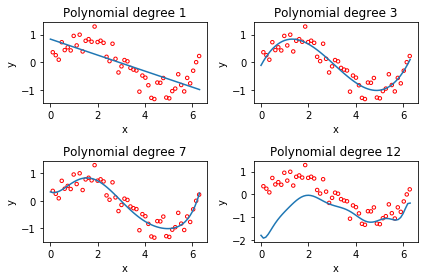

In [11]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [ ]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    indices = np.random.permutation(x.shape[0])
    train_x, test_x = x[indices[:80], :], x[indices[80:], :]
    train_y, test_y = y[indices[:80], :], y[indices[80:], :]
    return train_y, train_x, test_y, test_x
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [ ]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    train_y, train_x, test_y, test_x = split_data(x, y, seed)
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    x= train_x
    y = train_y
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    raise NotImplementedError
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [ ]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

# 3 Ridge Regression
Please fill in the function below.

In [ ]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    raise NotImplementedError


In [ ]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)